In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = '/content/drive/MyDrive/Gurnum/train'

In [7]:
val ='/content/drive/MyDrive/Gurnum/val'

In [9]:
# Set the path to the folder containing the 'train' folder
data_dir = train
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, str(label))
    print(folder_path)
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
           # Load the image and resize it to the desired size
           img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
           img = cv2.resize(img, img_size)
           # Append the image and label to the lists
           images.append(img)
           labels.append(label)

/content/drive/MyDrive/Gurnum/train/0
/content/drive/MyDrive/Gurnum/train/1
/content/drive/MyDrive/Gurnum/train/2
/content/drive/MyDrive/Gurnum/train/3
/content/drive/MyDrive/Gurnum/train/4
/content/drive/MyDrive/Gurnum/train/5
/content/drive/MyDrive/Gurnum/train/6
/content/drive/MyDrive/Gurnum/train/7
/content/drive/MyDrive/Gurnum/train/8
/content/drive/MyDrive/Gurnum/train/9


In [10]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [11]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val,str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [12]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

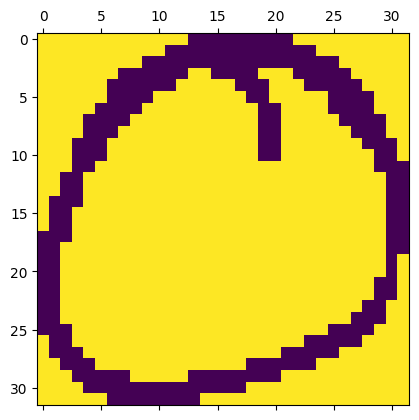

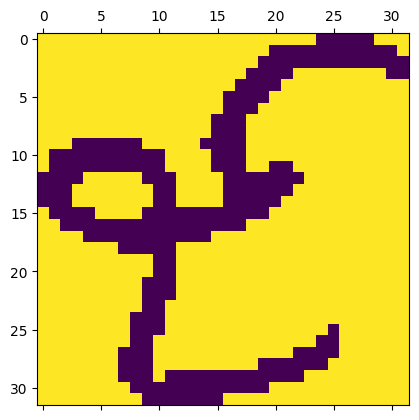

In [13]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train

In [14]:
# flatten the dataset i.e, change 2D to 1D
x_rail_flat = x_train.reshape(len(x_train),32*32)
x_test = x_test.reshape(len(x_test),32*32)
print(x_rail_flat.shape)
print(x_test.shape)
x_rail_flat[0]

(1000, 1024)
(178, 1024)


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [15]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# 5 iterations done here
model.fit(x_rail_flat, y_train,epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 158.8728 - accuracy: 0.3910
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 25.1943 - accuracy: 0.7830
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 11.5586 - accuracy: 0.8920
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.8953 - accuracy: 0.9230
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.5268 - accuracy: 0.9130


In [16]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
    ])
# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 17ms/step - loss: 153.8587 - accuracy: 0.4470 - val_loss: 75.4793 - val_accuracy: 0.5562
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 22.0302 - accuracy: 0.8040 - val_loss: 29.7457 - val_accuracy: 0.7360
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 13.3466 - accuracy: 0.8840 - val_loss: 29.1607 - val_accuracy: 0.7584
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 8.9165 - accuracy: 0.9050 - val_loss: 26.0304 - val_accuracy: 0.8034
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 7.8976 - accuracy: 0.9070 - val_loss: 19.0821 - val_accuracy: 0.8427
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 6.1221 - accuracy: 0.9270 - val_loss: 20.1394 - val_accuracy: 0.8652
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 2.5015 - accuracy: 0.9570 - val_loss: 21.0540 - val_accuracy: 0.8371
Epoch 8/

In [17]:
# Observation : we see a better accuracy from the 2nd iteration

In [18]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 0.7864 - accuracy: 0.8860 - val_loss: 1.0985 - val_accuracy: 0.7247
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7614 - accuracy: 0.9080 - val_loss: 1.0362 - val_accuracy: 0.8034
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.9540 - val_loss: 1.0014 - val_accuracy: 0.8539
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.9750 - val_loss: 0.9810 - val_accuracy: 0.8708
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.9890 - val_loss: 0.9674 - val_accuracy: 0.8876
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.9920 - val_loss: 0.9572 - val_accuracy: 0.8876
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.9950 - val_loss: 0.9490 - val_accuracy: 0.8933
Epoch 8/10
32/32 [==

In [19]:
# Observation : we got better result for all iterations on scaling the training dataset

In [20]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.9282 - accuracy: 0.8820


[0.9281949400901794, 0.882022500038147]

In [21]:
# Still there are some errors
# we need to modify our nn, we add some layers in the above model and different activation function

In [22]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])
# compile the nn
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 2s 32ms/step - loss: 1.4839 - accuracy: 0.6280 - val_loss: 0.8621 - val_accuracy: 0.7584
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 0.2255 - accuracy: 0.9250 - val_loss: 0.2870 - val_accuracy: 0.9157
Epoch 3/10
32/32 [==============================] - 1s 21ms/step - loss: 0.1126 - accuracy: 0.9700 - val_loss: 0.2051 - val_accuracy: 0.9494
Epoch 4/10
32/32 [==============================] - 0s 16ms/step - loss: 0.0745 - accuracy: 0.9800 - val_loss: 0.2847 - val_accuracy: 0.9101
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0834 - accuracy: 0.9780 - val_loss: 0.3117 - val_accuracy: 0.9270
Epoch 6/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0396 - accuracy: 0.9910 - val_loss: 0.2106 - val_accuracy: 0.9438
Epoch 7/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0306 - accuracy: 0.9960 - val_loss: 0.1863 - val_accuracy: 0.9438
Epoch 8/10
32

In [23]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.1925 - accuracy: 0.9494


[0.1924905627965927, 0.949438214302063]

In [24]:
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 4, 2, 5, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

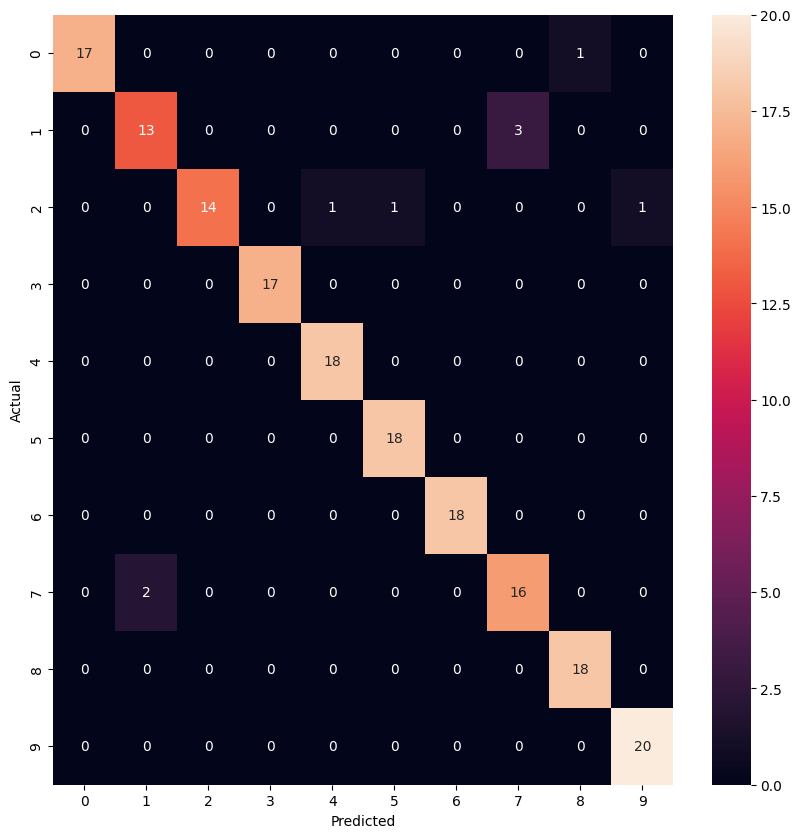

In [25]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 4ms/step - loss: 17.2994 - accuracy: 0.8876
Test accuracy: 0.8876404762268066


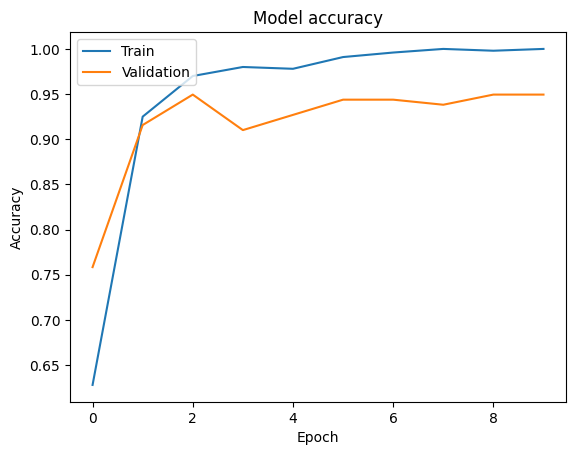

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()